In [1]:
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc
import h5py
from src.generators import *
import time
from matplotlib import pyplot as plt
from typing import List
from tqdm import tqdm
np.random.seed(0)

In [12]:

N = list(range(10, 1010, 50))
D = 1
d = [(3, 32, 32), (3, 64, 64), (3, 128, 128),  
 (3, 256, 256), (3, 512, 512), (3, 640, 640), (3, 800, 800), (3, 1024, 1024)]

generator = F3()
for item in N:
    for res in tqdm(d):
        generator.create_dataset(item,res,D,f"outputs/f3_{item}_{res}_{D}")

In [2]:
N = [10,50]
D =1
d = [(3, 32, 32),(3, 128, 128)]

In [3]:
generator = F3()
for item in N:
    for res in tqdm(d):
        generator.create_dataset(item,res,D,f"outputs/f3_{item}_{res}_{D}")

100%|██████████| 2/2 [00:00<00:00,  4.15it/s]


In [4]:
def is_leaf(name, node):
    """Check if a node is a dataset (leaf)."""
    return isinstance(node, h5py.Dataset)

def find_leaf_datasets(hdf5_file):
    """Find and return paths to all leaf datasets in an HDF5 file."""
    leaf_datasets = []

    # Traverse the HDF5 file
    hdf5_file.visititems(lambda name, node: leaf_datasets.append(name) if is_leaf(name, node) else None)
    
    return leaf_datasets

# D = 1 column wise

### Arrow 

In [16]:
from tqdm import tqdm
t_load_arrow_D1_c = []
t_manipulate_arrow_D1_c = []
iterations = 1

for item in N:
    tmp_load_res = []
    tmp_manipulate_res = []
    for res in d:
        tmp_load = []
        tmp_manipulate = []
        for j in tqdm(range(iterations)):
            st_time = time.time()
            ### LOADING ###
            table = pq.read_table(f'outputs/f3_{item}_{res}_{D}.parquet')
            ### ------- ###
            en_time = time.time()
            tmp_load.append(en_time - st_time)
            
            start_time = time.time()
            ### MANIPULATION ###
            
            oggetti = np.array(table.column("image_feature").chunk(0).values.field("image").to_pylist())
            image_numpy = np.frombuffer(oggetti, dtype=np.float64).reshape((-1,) + res)
            new_obj = np.transpose(image_numpy,axes=(0,3,2,1))   
            new_obj = np.square(new_obj)
            new_obj = np.exp(new_obj)
            new_obj = np.transpose(new_obj,axes=(0,3,2,1))
            ### ----------- ###
            end_time = time.time()
            tmp_manipulate.append(end_time-start_time)
        
        tmp_load_res.append(sum(tmp_load) / len(tmp_load))
        tmp_manipulate_res.append(sum(tmp_manipulate) / len(tmp_manipulate))
            
    t_load_arrow_D1_c.append(tmp_load_res)
    t_manipulate_arrow_D1_c.append(tmp_manipulate_res)

np.save("t_load_arrow_D1_c",t_load_arrow_D1_c)
np.save("t_manipulate_arrow_D1_c",t_manipulate_arrow_D1_c)

100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


In [18]:
np.array(t_load_arrow_D1_c).shape
print(t_load_arrow_D1_c)

[[0.005003690719604492, 0.012516498565673828], [0.0034584999084472656, 0.04202914237976074]]


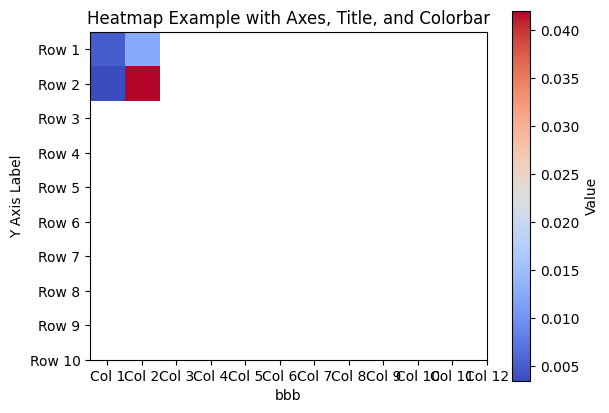

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

data = np.array(t_load_arrow_D1_c)

# Create the heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')

# Add colorbar (legend)
plt.colorbar(label='Value')

# Add title
plt.title('Heatmap Example with Axes, Title, and Colorbar')

# Add axes labels
plt.xlabel('bbb')
plt.ylabel('Y Axis Label')

# Customize the ticks (optional)
plt.xticks(ticks=np.arange(12), labels=[f'Col {i}' for i in range(1, 13)])
plt.yticks(ticks=np.arange(10), labels=[f'Row {i}' for i in range(1, 11)])

# Show the plot
plt.show()



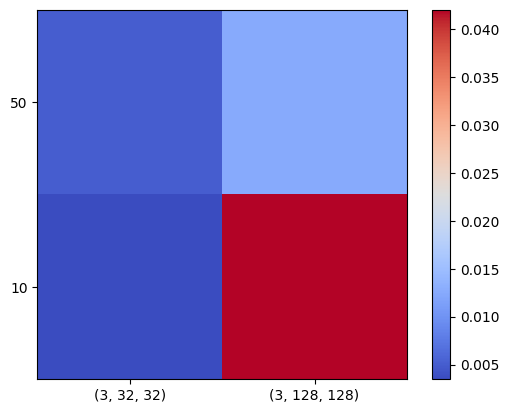

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.array(t_load_arrow_D1_c)
N_label = [str(item) for item in N]
d_label = [str(item) for item in d]
# Create the heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(ticks=np.arange(len(d_label)), labels=d_label)
plt.yticks(ticks=np.arange(len(N_label)), labels=["50","10"])

# Show the plot
plt.show()